# <center> Markov Model </center>
In this question, we will simulate the page rank.

In [112]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [113]:
# get inputs, we have a test case that we get if we input test: True
def get_inputs(test: bool) -> list:
    n = 3
    first_try = [0,0,1]
    transition_matrix = []

    sample_test = test 
    if not sample_test:
        # number of pages
        n = int(input())

        # the probabilities of occurence in the first try
        first_try = list(map(float,input().split()))

        transition_matrix = []

        # the probability matrix of going from page: row to page: col
        for _ in range(n):
            transition_matrix.append(list(map(float,input().split())))
    else : 
        n = 3
        first_try = [0,0,1]
        transition_matrix = [ [0.3, 0.2, 0.5]
                            ,[0.4, 0.3, 0.3]
                            ,[0.3, 0.4, 0.3]]
    return n,first_try,transition_matrix


# generate the CDF


def generate_CDF(pdf: list) -> list:
    CDF_list = []
    sum_first = 0
    for number in pdf:
        sum_first += number
        CDF_list.append(sum_first)
    return CDF_list

def get_CDFs(first_try: list, transition_matrix: list, n: int) -> tuple:
    first_CDF = generate_CDF(first_try)

    transition_CDF = []

    for row in range(n):
        transition_CDF.append(generate_CDF(transition_matrix[row]))
    return first_CDF,transition_CDF

def get_next_state(current_state:int,transition_CDF:list,n:int) -> int:
    random_simulation = random.random()
    next_state = 0
    for i in range(n-1):
        if transition_CDF[current_state][i] < random_simulation <= transition_CDF[current_state][i+1] :
            next_state = i+1
    return next_state

    
# print(first_CDF)
# print("------------")
# print(transition_CDF)

After Receiving our input, we start our simulation.<br>
We have two parameters in each move: 
<li> the state we our in
<li> the state we want to go to

We would want to use random and CDF to find our random number.

In [114]:
def simulate(number_of_steps:int,n:int,first_CDF:list,transition_CDF: list) -> list :
    first_random = random.random()
    states = [0 for _ in range(n)]
    
    first_step = 0
    for i in range(n-1):
        if first_CDF[i] < first_random <= first_CDF[i+1] :
            first_step = i+1
    states[first_step] += 1        
    current_state = first_step

    for _ in range(number_of_steps):
        current_state = get_next_state(current_state=current_state,transition_CDF=transition_CDF,n=n)
        states[current_state] += 1
    return [states[i]/sum(states) for i in range(n)]


Now We will run the simulation for number of steps: 1 to 10000000

3
[0, 0, 1]
[[0.3, 0.2, 0.5], [0.4, 0.3, 0.3], [0.3, 0.4, 0.3]]


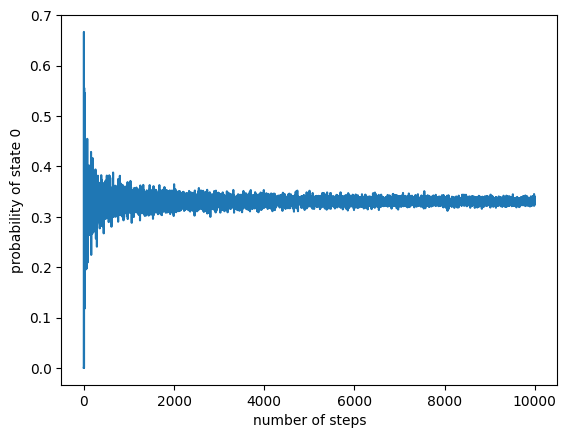

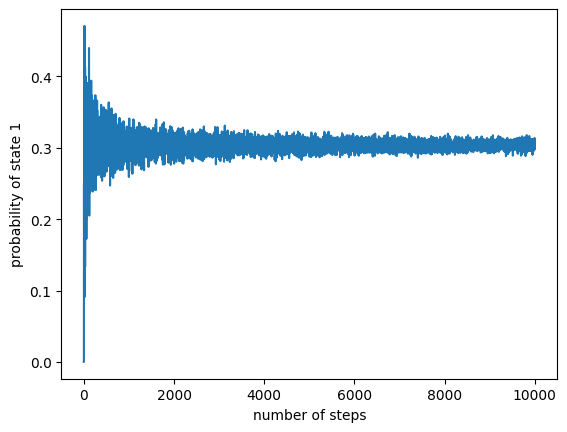

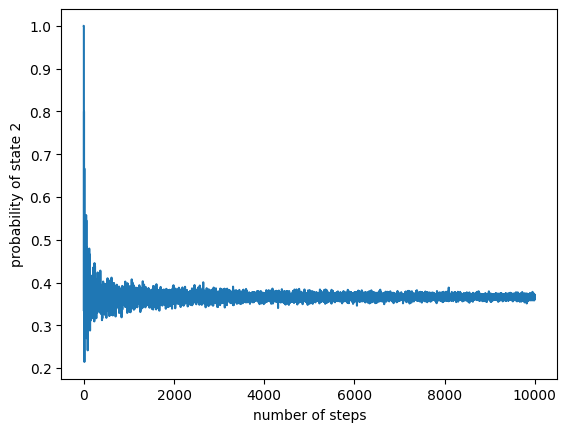

In [117]:
def plot_signal(x, y, i):
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel("number of steps")
    ax.set_ylabel(f"probability of state {i}")

def full_simulation(test: bool, steps: int, test_case: list) :
    NUMBER_OF_STEPS = steps
    
    if test_case == None : 
        (n,first_try,transition_matrix) = get_inputs(test)
    else :
        (n,first_try,transition_matrix) = test_case
    print(n)
    print(first_try)
    print(transition_matrix)
    probs = [[] for _ in range(n)]
    (first_CDF,transition_CDF) = get_CDFs(first_try=first_try,transition_matrix=transition_matrix,n=n)
    for i in range(NUMBER_OF_STEPS):
        prob = simulate(number_of_steps=i,n=n,first_CDF=first_CDF,transition_CDF=transition_CDF)
        for j in range(n) :
            probs[j].append(prob[j])

    x = [i for i in range(NUMBER_OF_STEPS)]
    for i in range(n) :
        plot_signal(x,probs[i],i)

full_simulation(test = True, steps = 10000,test_case = None)

We could conclude that increasing the number of steps will make our simulation more accurate

5
[0.2, 0.1, 0.2, 0.3, 0.2]
[[0.1, 0.2, 0.1, 0.4, 0.2], [0.1, 0.1, 0.1, 0.1, 0.6], [0.2, 0.2, 0.2, 0.2, 0.2], [0.3, 0.4, 0.1, 0.1, 0.1], [0.5, 0.1, 0.1, 0.1, 0.2]]


' 5\n[0.2, 0.1, 0.2, 0.3, 0.2]\n[[0.1, 0.2, 0.1, 0.4, 0.2], [0.1, 0.1, 0.1, 0.1, 0.6], [0.2, 0.2, 0.2, 0.2, 0.2], [0.3, 0.4, 0.1, 0.1, 0.1], [0.5, 0.1, 0.1, 0.1, 0.2]]'

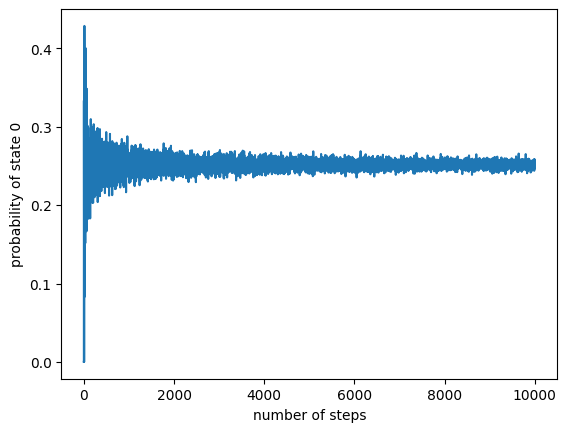

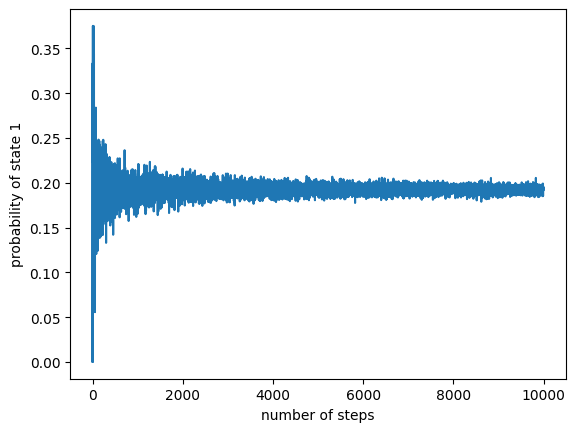

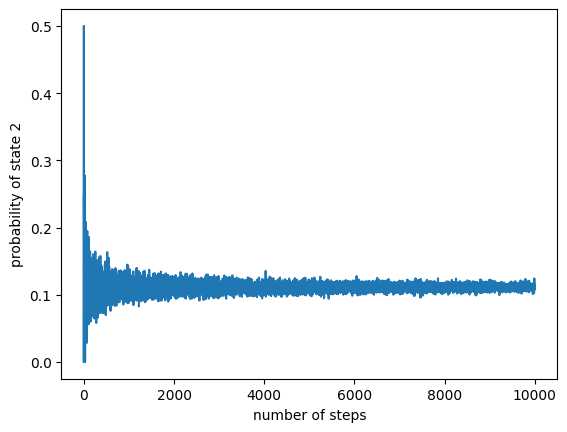

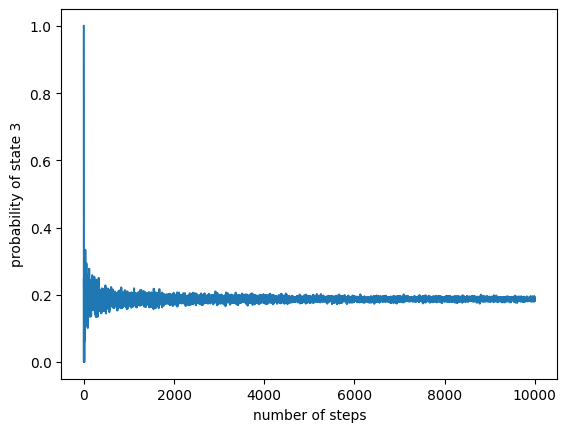

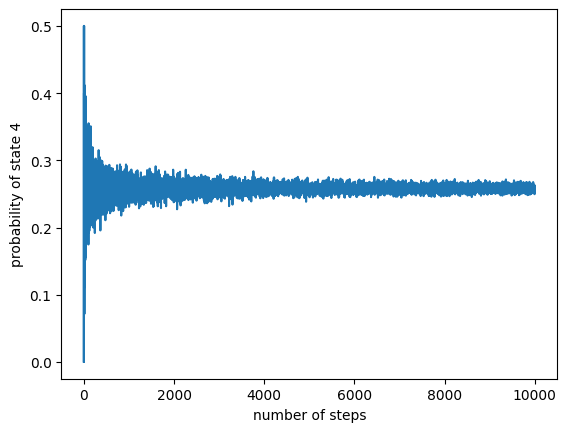

In [116]:
test_case1 = [
5,
[0.2, 0.1, 0.2, 0.3, 0.2],
[[0.1, 0.2, 0.1, 0.4, 0.2], [0.1, 0.1, 0.1, 0.1, 0.6], [0.2, 0.2, 0.2, 0.2, 0.2], [0.3, 0.4, 0.1, 0.1, 0.1], [0.5, 0.1, 0.1, 0.1, 0.2]]
]

full_simulation(test = False, steps=10000,test_case=test_case1)

''' 5
[0.2, 0.1, 0.2, 0.3, 0.2]
[[0.1, 0.2, 0.1, 0.4, 0.2], [0.1, 0.1, 0.1, 0.1, 0.6], [0.2, 0.2, 0.2, 0.2, 0.2], [0.3, 0.4, 0.1, 0.1, 0.1], [0.5, 0.1, 0.1, 0.1, 0.2]]'''